In [2]:
#Question 1
import sys
print(sys.version)

3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]


In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

2018년도 ETH의 요약 정보입니다.
(단위: %)
평균: 2.0556665359213846
최댓값: 31.67083516236715
최소값: -4.036567360394794
표준편차:3.7565586765143344


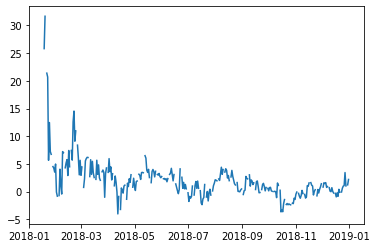

In [3]:
#Question 2 확인
df=fdr.DataReader('BTC/USD','2016-01-01','2016-12-31')
df.head()
def K_premium():
    coin_name = input('암호화폐 기호를 입력해주세요: ') # 기호는 BTC 등
    year = input('관심 연도를 입력해주세요: ')
    # df1,2,3 순서대로 국내거래소 정보, 해외거래소 정보, 환율 정보
    df1 = fdr.DataReader(coin_name + '/' + 'KRW', year + '-01-01',year + '-12-31')
    df2 = fdr.DataReader(coin_name + '/' + 'USD', year + '-01-01',year + '-12-31')
    df3 = fdr.DataReader('KRW/USD', year + '-01-01', year + '-12-31')
  
    # 일별 종가 값만 고려
    sell = df1['Close'] #매도
    buy = df2['Close']  #매수
    exchange_rate = df3['Close']
    
    K_premium = (sell/(buy/exchange_rate)-1)*100
    
    print('==============================================')
    print(f'{year}년도 {coin_name}의 요약 정보입니다.') # format 함수 이용
    print('(단위: %)')
    print('==============================================')
    print(f'평균: {K_premium.mean()}') # mean, format 함수 이용
    print(f'최댓값: {K_premium.max()}') # max, format 함수 이용
    print(f'최소값: {K_premium.min()}') # min, format 함수 이용
    print(f'표준편차:{K_premium.std()}') # std, format 함수 이용
    print('==============================================')

    plt.plot(K_premium)
    plt.show()
K_premium()

In [4]:
#Question 3
def maxProfit(prices):     # maxProfit 함수의 input으로는 prices 변수가 들어갑니다.
	max_profit = 0           # max_profit 변수의 값을 초기화합니다.
	min_price=min(prices)
	min_idx=prices.index(min_price)
	max_price=max(prices[min_idx:])
	if max_price>min_price:
    		return max_price-min_price
	else:
		return 0  

p = [7000, 1000, 5000, 3000, 6000, 4000]
print(maxProfit(p))
prices = [7000, 6000, 4000, 3000, 1000]
print(maxProfit(prices))
#1번째 날 1000원에 주식을 매수하고 4번째 날 6000원으로 주식을 매도하면 
# 이익은 6000원 - 1000원 = 5000원이 됩니다. 여기서 주의할 점은 주식을 매도하기 전에는 
# 반드시 주식을 매수해야 하기 때문에,1번째 날 주식을 매수하고 0번째 날 주식을 매도할 수 없습니다.

5000
0


In [5]:
#Question 4
#1
T = 10 #10기간을 의미합니다
r = 0.12 #이자율을 의미합니다
P = [0,100,200,300,400,300,200,100,50,50,100] #시기별 현금 흐름을 의미합니다
pv=0
for i in range(T):
    pv= pv+(P[i]/(1+r)**i)
print(pv)

1071.4796606346547


In [11]:
#Question 4
#2
import numpy as np

#성장률
g_mu = 0.01
g_sigma = 0.003
g = np.random.normal(g_mu, g_sigma, 100)

#이자율
r_mu = 0.1
r_sigma = 0.0005
r = np.random.normal(r_mu, r_sigma, 100)
#배당
D0 = np.random.randint(low = 80, high = 2000)

#미래 배당액을 저장할 array만들기
D = np.zeros(100)

#각 미래 배당액에 대응하는 이자율을 저장할 array 만들기
R = np.zeros(100)
#초기값 설정
D[0] = D0*(1+g[0])
#D[0]에 저장되는 값은 T=1시점의 배당액입니다.

R[0] = 1+r[0]
#할인할 때는 (1+이자율)을 사용하기 때문에, T=1시점의 배당을 할인해주기 위한 T=0~1시점의 R[0]을 형성합니다.

#T = 1 시점의 미래 배당액의 현재 가치는 다음과 같이 표시될 수 있습니다.
PV = D[0]/R[0]

for i in range(1,100):
    D[i] = D[i-1]*(1+g[i])    
    R[i] = R[i-1]*(1+r[i])
    PV = PV + D[i]/R[i]
print(PV)

13048.04464317273